# Aprendizaje Supervisado - Naive Bayes (Bayes Ingenuo)

Los clasificadores de Bayes ingenuos son clasificadores lineales conocidos por su simpleza y eficiencia. El modelo probabilístico de los clasificadores de Bayes ingenuos se basa en el Teorema de Bayes y el adjetivo *ingenuo* viene de la suposición  de que las características en la base de datos son mutuamente independientes.

![Naive Bayes](imagenes/Bayes.png)

En la práctica, la suposición de independencia se viola frecuentemente, pero el clasificador de Bayes ingenuo tiende a tener un buen desempeño aún bajo esta suposición poco realista, especialmente para tamaños pequeños de muestra.

Este clasificador está construido con base en la probabilidad a posteriori, la cuál está definida por el teorema de Bayes de la siguiente manera:<br/><br/>

$$ P_{a-posteriori} = \frac{P_{condicional} \times P_{a-priori}}{evicencia}$$

En clasificación esto es:<br/><br/>
$$P(\omega_j|\mathbf{x}_i)=\frac{P(\mathbf{x}_i|\omega_j)P(\omega_j)}{P(\mathbf{x}_i)}$$

La función objetivo en la probabilidad de Bayes ingenuo, es maximizar la probabilidad a posteriori dado el conjunto de entrenamiento, en orden de formular la regla de decisión.



In [1]:
%matplotlib inline

import numpy as np    #Para el manejo de arreglos
import pandas as pd   #Para el manejo de conjuntos de datos, tratados como tablas
import seaborn as sns #Para la construcción y visualización de gráficos
import matplotlib.pyplot as plt #Pra la construcción de gráficos

from sklearn import naive_bayes #importamos la librería que contiene el clasificador de Bayes
from sklearn import metrics #Las métricas de rendimiento de un clasificador
from sklearn import model_selection #Para el particionamiento de los conjuntos de datos
from sklearn import datasets #Conjuntos de datos predefinidos en sklearn
from sklearn import preprocessing #Nos ayuda a convertir características categóricas a numéricas


## 1. Veámos un ejemplo Básico

Vamos a empezar con un ejemplo básico, el cual consiste en determinar si un jugador jugará un partido con base en las condiciones del clima y la temperatura

### 1.1. Crear el conjunto de datos

 Empecemos construyendo el conjunto de datos de juguete (toy set).

In [2]:
#Creamos tres vectores: 2 con las características y el otr con las etiquetas
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

Dado que las característcias son categóricas, debemos transformar estas a valores numéricos: 

In [3]:
#Creamos el codificador
le = preprocessing.LabelEncoder()

#Convertimos las etiquetas a números
weather2 = le.fit_transform(weather)
temp2 = le.fit_transform(temp)
y = le.fit_transform(play)

print ("Etiquetas: ", y)

Etiquetas:  [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


A partir de los vectores creamos la matriz de datos

In [4]:
X = np.vstack([weather2.T, temp2.T])
X = X.T
#X = np.vstack([weather2, temp2])

### 1.2. Entrenamos el modelo

Note que en sklearn los modelos para Naive Bayes se diferencian unos de otros dependiendo de como estiman la probabilidad $P(x_i|c_j)$. En este caso usamos la versión que estima dicha probabilidad asumiendo una Gaussiana Univariada, cuyos parámetros se estiman a partir de la muestra.

In [5]:
#Definimos el modelo
nv = naive_bayes.GaussianNB()

# Entrenamos el modelo
nv.fit(X,y)

print ("Media de cada característica, por clase: \n", nv.theta_)
print ("\nVarianza de cada característica, por clase:\n", nv.sigma_)


Media de cada característica, por clase: 
 [[1.6        1.2       ]
 [0.77777778 1.11111111]]

Varianza de cada característica, por clase:
 [[0.24       0.56      ]
 [0.61728395 0.7654321 ]]


### 1.3. Usamos el modelo para hacer una predicción

In [6]:
#Predecimos si el jugador va a jugar considerando que las características Weather 0:Overcast, Temp 2:Mild
predicted = nv.predict([[0,2]])

print ("Valor que se predice:", predicted)

Valor que se predice: [1]


## 2. Hagamos un ejercicio con unos datos simulados

Realiza las gráficas de la matriz de observaciones con todas las posibles combinaciones de las características (e.j. Característica 1 vs Característica 2, Característica 1 vs Característica 3, etc). Asegúrate de que cada una de las clases se vea de un color diferente para saber cuáles características serían mejores para clasificar (las que sean linealmente separables). Para esto use seaborn.


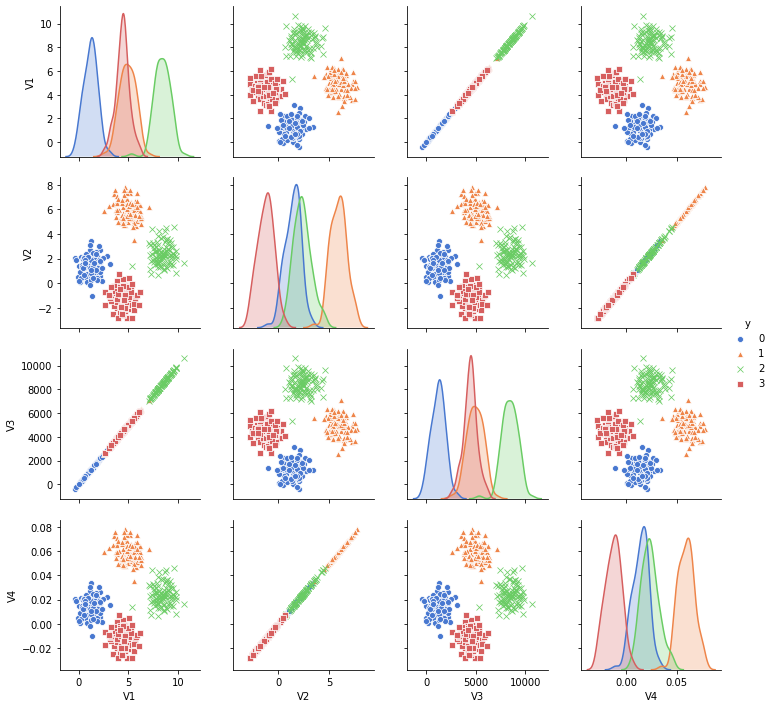

In [7]:
#Primero importamos el archivo de datos que contiene el conjunto de entrenamiento.
#Use la función read_csv de pandas 
dataset = pd.read_csv('datos/Data_NaiveBayes.txt')

# Usamos el paquete seaborn para visualizar las características
# Use la función pairplot para mostrar las características de a pares
# vars=dataset.columns[:-1] : Elimina la clase de las características a plotear
# hue="y" : Esto indica cual es el atributo que representa la clase 
# diag_kind='kde' : esto indica que en la diagonal se muestra una estimación de la PDF de la característica
# markers=["o", "^", "x", "s"] : define los marcadores para cada clase
# palette="muted" : establece la paleta de colores

sns.pairplot(dataset, vars=dataset.columns[:-1], diag_kind='kde', hue="y", markers=["o", "^", "x", "s"], palette="muted")

<div style="padding:10px; border-radius:10px; border:2px solid #4BACC6; background:#EEEEEE">
<span style="color:#4BACC6" ><h3>**Para Tener en Cuenta:**</h3></span> <h4>¿Son todas las caracteristicas de este conjunto de datos relevantes?, ¿Por qué? </h4></div>

Ahora, proceda a particionar el conjunto de datos para entrenamiento y validación usando 70% y 30%, respectivamente. Adicionalmente, normalice los datos usando un StandardScaler.

In [8]:
#Obtenga X e y del DataFrame
X = dataset.values[:,:-1]
y = dataset.values[:,-1]

#Separe el conjunto en dos partes: una para entrenar y otra para validar
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

#Normalice con base en el conjunto de entrenamiento
scl = preprocessing.StandardScaler()
scl.fit(X_train)

X_train_std = scl.transform(X_train)
X_test_std = scl.transform(X_test)

Procedemos a entrenar el modelo. En este caso, usaremos un clasificador Bayesiano Ingenuo, asumiendo distribuciones Gaussianas sobre cada característica de manera individual.

In [9]:
#Defina el modelo del clasificador
nv = naive_bayes.GaussianNB()

#Entrene el clasificador usando el conjunto de entrenamiento preprocesado
nv.fit(X_train_std, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Finalmente, procedemos a evaluar el clasificador

In [10]:
#Predecir la clase del conjunto de test
y_pred = nv.predict(X_test_std)

#Calcule la precisión y muestre la matriz de confusión
acc = metrics.accuracy_score(y_test, y_pred)
mat = metrics.confusion_matrix(y_test, y_pred)

print ("Precisión del clasificador: %.2f " %(acc*100.0) )
print ("\nMatriz de Confusión: \n", mat)

Precisión del clasificador: 99.17 

Matriz de Confusión: 
 [[34  0  0  0]
 [ 0 30  0  0]
 [ 0  0 30  1]
 [ 0  0  0 25]]


Ahora, utiliza como matriz de observaciones $\mathbf{X}$ el conjunto de todas las observaciones pero **únicamente** con las dos combinaciones de características que consideras mejor separan las clases de acuerdo a las gráficas del **ejercicio anterior**. Preprocesa, particiona y clasifica con esa nueva matriz de observaciones. ¿Funciona mejor o peor el clasificador?

In [11]:
#Codifique la solución aquí

## 3. Hagamos un ejercicio con un conjunto de datos real

In [12]:
#Importamos el conjunto de datos desde Sklearn
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

Cómo se puede observar, el conjunto de datos está almacenado en un diccionario, así que debemos separar los tres elementos que nos importan de él:
- X: la matriz de datos
- y: el vector de etiquetas
- Xn: los nombres de las características

Tenga presente que las calses Benigno (0) y Maligno (1)

In [14]:
#Separamos el dataset
X = dataset['data']
y = dataset['target']
Xn = dataset['feature_names']

Ahora particionamos el conjunto de datos en dos partes: una para entrenar y otra para validar

In [15]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

Procedemos a entrenamos el clasificador

In [16]:
#Se define el modelo del clasificador a entrenar
nv = naive_bayes.GaussianNB()

#Se entrena el clasificador usando el conjunto de entrenamiento preprocesado
nv.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Finalmente, evaluamos el modelo

Precisión del clasificador: 92.40 

Matriz de Confusión: 
 [[ 57   6]
 [  7 101]]


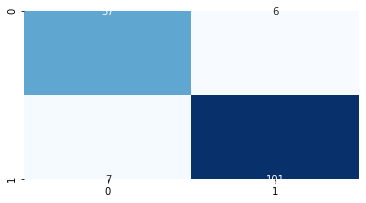

In [17]:
#Predecir la clase del conjunto de test
y_pred = nv.predict(X_test)

#Calcule la precisión y muestre la matriz de confusión
acc = metrics.accuracy_score(y_test, y_pred)
mat = metrics.confusion_matrix(y_test, y_pred)

print ("Precisión del clasificador: %.2f " %(acc*100.0) )
print ("\nMatriz de Confusión: \n", mat)


#Esta es otra forma de ver la matriz de confusión
sns.heatmap(mat, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")